# E-news Express Hypothesis Testing 

## Introduction:


E-news express is working on launching a new landing page on the company website with the purpose of gathering new subscribers to the service. In order to test the efficacy of the new landing page, an A/B test was conducted wherein a sample of 100 visitors to the website were examined in order to confirm if the new site was more effective or not. Half of the group served as the control group and they were shown the existing "old" webpage and the other group was the treatment group which was exposed to the "new" landing page. The test then measured what proportion of each group were converted into new subscribers. Additional details such as page language and time spent on the page per user were also collected to see how these factors also influenced conversion rate.

## Problem Statement:

Is the new page more effective at garnering new subscribers and therefore worth additional investment, or has there been no real change in conversion rate amongst the user population regardless of which page is used?

#### Data Dictionary:
-user_id - The user id of the user who visited the news portal landing page,

-group - The group the user belongs to (control vs treatment). The control group visited the old page and the treatment group visited the new page. 

-landing_page - which landing_page version (new vs. old) that the user visited.

-time_spent_on_the_page - How much time (in minutes) was spent on the page by the user. 

-converted - whether or not the user became a subscriber (yes vs no).

-language_preferred - which language (English, French or Spanish) that the user chose to view the page.


In [1]:
#Import Necessary Packages
import pandas as pd #library used for data manipulation and analysis
import numpy as np # library used for working with arrays.
import matplotlib.pyplot as plt # library for plots and visualisations
import seaborn as sns # library for visualisations
from matplotlib import pyplot as plt
%matplotlib inline 
import scipy.stats as stats 
from matplotlib.pyplot import figure
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

sns.set_style("darkgrid")
sns.set()

In [2]:
#Read in CSV
df = pd.read_csv('abtest-1.csv')

In [3]:
#observer dataframe shape
df.shape

(100, 6)

The sample size has 100 rows and 6 columns.

In [4]:
#Reviewing the null values and data types for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


There is only one notable numeric variable within the data set (time spent on the page) as user id is mostly irrelevant for the purposes of hypothesis validation. The rest of the factors observed are all objects and catagorical in nature and can be converted to catagorical variables for the purpose of saving disk space. There are no null values in any of the columns of the data set.

In [5]:
#Converting the nonnumeric columns to categories to save disk space
df['group'] = df['group'].astype('category')
df['landing_page'] =df['landing_page'].astype('category')
df['converted'] = df['converted'].astype('category')
df['language_preferred'] = df['language_preferred'].astype('category')

In [6]:
#confirming datatypes after converting the object columns to categories as appropriate
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   user_id                 100 non-null    int64   
 1   group                   100 non-null    category
 2   landing_page            100 non-null    category
 3   time_spent_on_the_page  100 non-null    float64 
 4   converted               100 non-null    category
 5   language_preferred      100 non-null    category
dtypes: category(4), float64(1), int64(1)
memory usage: 2.5 KB


- After converting all the string variables, now the data set contains 4 catagorical variables and 1 float variable. 
- As mentioned earlier the user_id column remains irrelevant.

In [7]:
#Summary statistics for the dataframe
df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
user_id,100,NaN,NaN,NaN,546517,52.2958,546443,546468,546492,546567,546592
group,100,2,treatment,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
landing_page,100,2,old,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
time_spent_on_the_page,100,NaN,NaN,NaN,5.3778,2.37817,0.19,3.88,5.415,7.0225,10.71
converted,100,2,yes,54,NaN,NaN,NaN,NaN,NaN,NaN,NaN
language_preferred,100,3,Spanish,34,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
#Taking an initial sample of the dataset to get an initial grasp of the user data.
df.sample(5)

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
36,546551,control,old,3.13,no,English
33,546577,control,old,4.52,no,Spanish
8,546461,treatment,new,10.71,yes,French
30,546464,treatment,new,5.41,yes,English
95,546446,treatment,new,5.15,no,Spanish


- There are a total of 100 users in the sample. 
- The dataset is split 50/50 between the control and treatment groups which were exposed to the old and new pages respectively. 
- The most common language preferred is Spanish although French and English users were also observed.
- The converted field is follows a binomial distribution where final conversion is denoted as either 'yes' or 'no'.  
- Although the time spent on the page has a slight left skew, the median and mean values are fairly close together at a little over 5 seconds. This indicates a distinct possibility that that the time spent will follow a more normalized distribution that is symmetrical.

In [9]:
#Removing the user_id column to clean up the dataset as that field will serve no purpose in terms of this preliminary analysis
df = df.drop('user_id', axis = 1)

In [10]:
#Confirming the data view
df.head()

,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,control,old,3.48,no,Spanish
1,treatment,new,7.13,yes,English
2,treatment,new,4.40,no,Spanish
3,control,old,3.02,no,French
4,treatment,new,4.75,yes,Spanish


## Exploratory Data Analysis




### Univariate

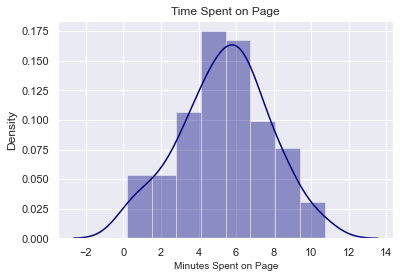

In [11]:
#Basic distplot to understand the distribution of the timespent per user on the webpage regardless of version.
lang = sns.distplot(df['time_spent_on_the_page'], color = 'navy')
lang.set_xlabel("Minutes Spent on Page", fontsize = 10)
lang.set(title='Time Spent on Page')
#figure(figsize=(10, 10))
plt.savefig('histogram_time_spent.png')

As expected, the time spent on the page appears to follow a normal distribution. 

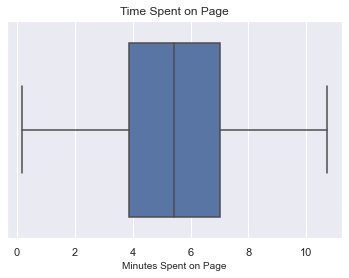

In [12]:
#Creating a box plot to have a better grasp of the overall statiscal summary for the time spent on either landing page amongst the 100 user sample group
lang =sns.boxplot(x='time_spent_on_the_page', data =df)
#lang.set_ylabel("Minutes Spent on Page", fontsize = 10)
lang.set_xlabel("Minutes Spent on Page", fontsize = 10)
lang.set(title='Time Spent on Page')
#figure(figsize=(10, 10))
plt.savefig('box_plot_timespent.png')

The minimum amount of time spent on the page is .19 minutes and the maximum is 10.71 minutes. The mean amount of time spent is ~5.4 minutes and the median is about ~5.4 minutes as well which explains why the distribution appears symmetrical on both the box plot and the distplot.

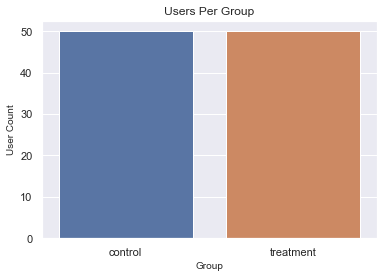

In [13]:
#Graph to confirm the distribution of the control and treatment groups
lang =sns.countplot(x ='group', data =df)
lang.set_ylabel("User Count", fontsize = 10)
lang.set_xlabel("Group", fontsize = 10)
lang.set(title='Users Per Group')
#figure(figsize=(10, 10))
plt.savefig('group_count.png')

In [14]:
pd.crosstab(df.group, df.landing_page, margins=True, margins_name="Total")


landing_page,new,old,Total
group,,,
control,0,50,50
treatment,50,0,50
Total,50,50,100


As expected, the sample is split 50/50 between the control and treatment groups. The control group only viewed the old version of the web page, and the treatment group only visted the new version.

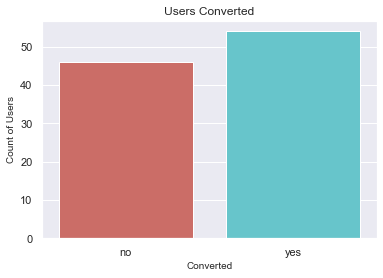

In [15]:
#Creating a graph to compare overall conversion rates overall
lang = sns.countplot(x ='converted', data =df, palette = 'hls')
lang.set_ylabel("Count of Users", fontsize = 10)
lang.set_xlabel("Converted", fontsize = 10)
lang.set(title='Users Converted')
#figure(figsize=(10, 10))
plt.savefig('converted_count.png')

Slightly more people in the sample were converted than not. We don't yet know how much this breakdown is influenced by which page was being viewed.

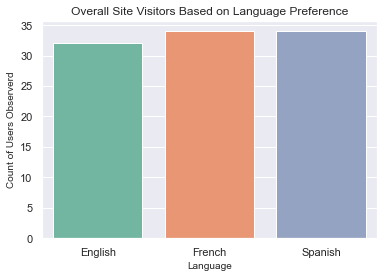

In [16]:
#Creating a simple graph to see how many users were observed in each language group
lang =sns.countplot(x='language_preferred', data =df,palette= 'Set2')
lang.set_ylabel("Count of Users Observerd", fontsize = 10)
lang.set_xlabel("Language", fontsize = 10)
lang.set(title='Overall Site Visitors Based on Language Preference')
#figure(figsize=(10, 10))
plt.savefig('language_count.png')

The number of users for each language is fairly uniformly distributed amongst the three languages however, there were  slightly fewer users exposed to the English version of the page in the sample when compared to the Spanish or French versions.

### Bivariate/Multivariate

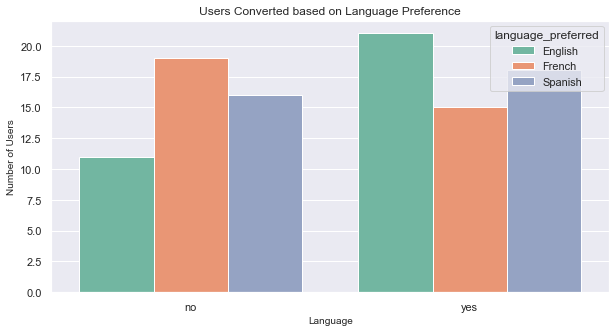

In [17]:
#Creating a graph to understand the relationship between conversion  and language preference
from matplotlib import pyplot as plt
plt.figure(figsize=(10,5))
bo = sns.countplot(x='converted', hue = 'language_preferred', data =df, palette= 'Set2')
bo.set_ylabel("Number of Users", fontsize = 10)
bo.set_xlabel("Language", fontsize = 10)
bo.set(title='Users Converted based on Language Preference')
#figure(figsize=(10, 10))
#plt.legend(loc='upper left')
#figure(figsize=(20, 20))
plt.savefig('language_converted_count.png')

- Overall it appears that for two of the three languaes (English and Spanish), more users tend to be converted than not irrespective of what page is being used.
- In fact, the English version of the page appears to have converted about 2/3 of the users into news subscribers who visited the site. 
- Only in the case of the French version did the number of people who remained unconverted exceeded the number of users who were converted.

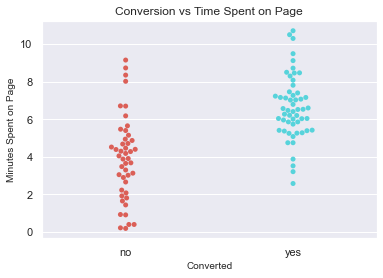

In [18]:
#Creating a swarm plot to understand the relationship between timespent and conversion rate
bo = sns.swarmplot(x = 'converted', y ='time_spent_on_the_page', data = df, palette = 'hls')
bo.set_ylabel("Minutes Spent on Page", fontsize = 10)
bo.set_xlabel("Converted", fontsize = 10)
bo.set(title='Conversion vs Time Spent on Page')
#figure(figsize=(10, 10))
plt.savefig('converted_swarn.png')

- There appears to be a larger variance in the time spent by the users who not were converted compared to those who were. 
- Additionally, in this sample, given that the overall range of the time spent by users who were converted compared to those who were not, this may suggest that the more time a user spends on the page, the more likely they are to subscribe.  
- The majority of the time spent by users who were converted is clustered between the 5-8 minute range, whereas the time spent by users who were not converted remain relatively more evenly dispersed between 0 and 7 minutes.

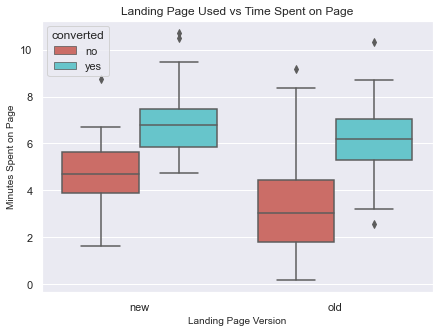

In [19]:
#Creating box plots to analyze the time spent and conversion rates btween the old and new webpages
plt.figure(figsize=(7,5))
bo =sns.boxplot(x='landing_page', y='time_spent_on_the_page',hue = 'converted', data =df, palette= 'hls')
bo.set_ylabel("Minutes Spent on Page", fontsize = 10)
bo.set_xlabel("Landing Page Version", fontsize = 10)
bo.set(title='Landing Page Used vs Time Spent on Page')
#figure(figsize=(10, 10))
plt.savefig('landing_page_converted_box_plot.png')

- Comparing the conversion rates of both the old and new versions of the web page, there is less variance in the time spent on the new page by the treatment group compared to the control group on the old web page.
- On both pages, there is less variance amongst users who were converted compared to those who were not. 
- The range of the time spent on the page by users of the treatment group who were then converted is higher than the range of the control group who were then converted.


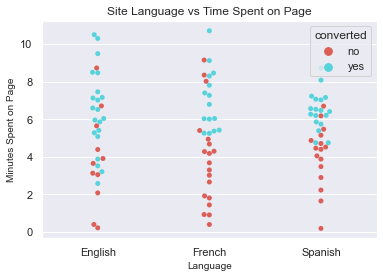

In [20]:
#Creating a graph to understand how time spent is dispersed amongst the three language groups and how that impacts conversion
lang = sns.swarmplot(x= 'language_preferred',y ='time_spent_on_the_page', data=df,hue ='converted',palette = 'hls')#.set(title='Languages vs Timespent')
lang.set_ylabel("Minutes Spent on Page", fontsize = 10)
lang.set_xlabel("Language", fontsize = 10)
lang.set(title='Site Language vs Time Spent on Page')
#figure(figsize=(10, 10))
plt.savefig('language_converted_box_plot.png')

Across all language groups, users who spend more time on the site tended to become subscribers to the site compared to those who did not. 

## Hypothesis Testing

### Q1 Do the users spend more time on the new landing page than the old landing page?

The null hypothesis (default assumption): <br>

There is no difference between the time spent on the new page and the old page.

>$H_0:\mu_1new=\mu_2old$

The alternate hypothesis: <br>
On average, more time is spent on the new page than the old one.

>$H_a:\mu_1new>\mu_2old$

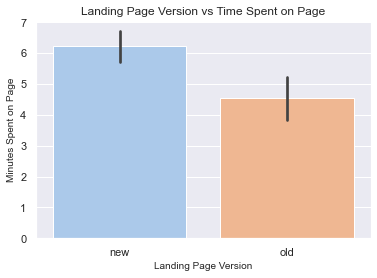

In [21]:
#Creating graph to analyze how much time is spent on the two landing pages
#figure(figsize=(10, 10))
lang= sns.barplot(x ='landing_page', y = 'time_spent_on_the_page', data= df, palette = 'pastel')
lang.set_ylabel("Minutes Spent on Page", fontsize = 10)
lang.set_xlabel("Landing Page Version", fontsize = 10)
lang.set(title='Landing Page Version vs Time Spent on Page')
#figure(figsize=(10, 10))
plt.savefig('landing_page_timespent.png')

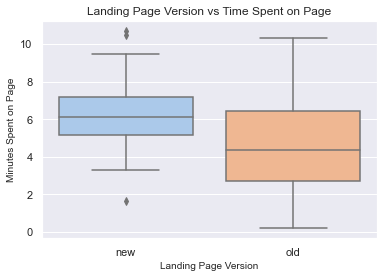

In [22]:
#Creating graph to analyze how much time is spent on the two landing pages in the form of box plots
lang = sns.boxplot(x ='landing_page', y = 'time_spent_on_the_page', data =df, palette = 'pastel')
lang.set_ylabel("Minutes Spent on Page", fontsize = 10)
lang.set_xlabel("Landing Page Version", fontsize = 10)
lang.set(title='Landing Page Version vs Time Spent on Page')
#figure(figsize=(10, 10))
plt.savefig('landing_time_spent_box_plot.png')

- Upon first glance, overall the amount of time spent on the new page is greater than the time spent on the old page. 
- The time spent per user on the new page is  consistently in the higher range as 75% of values are 5min and above compared to the 3 minute and above mark for the old page. which lends credibility to the alternative hypothesis. 

- There is also significantly less variance among the users who viewed the new page. 

#### Hypothesis Testing: Equality of Means

In order to test the viability of the null and alternative hypothesis on this sample, a simple equality of means T-test can be performed as the standard deviations of the populations are unknown. Given that the sample size for both users who were exposed to the new and the old pages is greater than 30, per the central limit theorem, a z-test could also be performed in this case.

In [23]:
#Calculating the mean and standard deviation of time spent per landing page
time_spent = df[['landing_page', 'time_spent_on_the_page']].groupby('landing_page')['time_spent_on_the_page'].mean()
time_spent_sigma = df[['landing_page', 'time_spent_on_the_page']].groupby('landing_page')['time_spent_on_the_page'].std()

In [24]:
#Assigning the mean and standard deviations for the old and new landing pages to individual variables
old_pg_average, new_pg_average= time_spent['old'],time_spent['new']
old_pg_sigma, new_pg_sigma= time_spent_sigma['old'],time_spent_sigma['new']

#Printing variable assignment
print(f'the mean time spent on the old page is {old_pg_average.round(3)} minutes')
print(f'the mean time spent on the new page is {new_pg_average.round(3)} minutes')
print(f'the standard deviation of the time spent on the old page is {old_pg_sigma.round(3)} minutes')
print(f'the the standard deviation of the time spent on the new page is {new_pg_sigma.round(3)} minutes')

the mean time spent on the old page is 4.532 minutes
the mean time spent on the new page is 6.223 minutes
the standard deviation of the time spent on the old page is 2.582 minutes
the the standard deviation of the time spent on the new page is 1.817 minutes


In [25]:
#putting the old and new time spent in variables for further calculations
all_time_spent = df[['landing_page', 'time_spent_on_the_page']]
new = df[df['landing_page']=='new']
old = df[df['landing_page']=='old']

In [26]:
#import the required functions
from scipy.stats import ttest_ind

# compute the test statistic and finding the p-value
test_stat, p_value = ttest_ind(new['time_spent_on_the_page'], old['time_spent_on_the_page'].dropna(), equal_var = False, alternative = 'greater')
print('The p-value is ', p_value)

The p-value is  0.0001392381225166549


Given that the pvalue is less that .05 (representing the 5% significance level), based on this sample, there is evidence to suggest that we can reject the null hypothesis and conclude that users in the population tend to spend more time on the new page than the old one. 

### Q2  Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?


The null hypothesis (default assumption): <br>
the proportion of users who got converted that visited the new page is the same as the proportion of converted users who visited the old page.

>$H_0:p_1new =p_2old$

Alternate Hypothesis: <br>
The proportion of converted users who visited the new page is greater than the proportion which visited the old page.

>$H_a:p_1new > p_2old$

In [27]:
#Creating dataframe with the number of users per group
users_per_group = pd.DataFrame(df['landing_page'].value_counts())
#Creating a dataframe with the number of converted users per group
converted_per_group = pd.DataFrame(df[['converted', 'landing_page']][df[['converted', 'landing_page']]['converted'] =='yes']['landing_page'].value_counts())
#Merging the two dataframes together
merged = pd.merge(left=users_per_group, left_index=True,
                  right=converted_per_group, right_index=True,
                  how='inner')
#Renaming Columns Appropriately
merged =merged.rename(columns={"landing_page_x": "Users per Group", "landing_page_y": "Converted"})


In [28]:
#Creating an "Unconverted" column for graphing purposes
merged['Unconverted'] = merged['Users per Group'] - merged['Converted']
conv = merged[['Converted', 'Unconverted']]

In [29]:
merged

,Users per Group,Converted,Unconverted
old,50,21,29
new,50,33,17


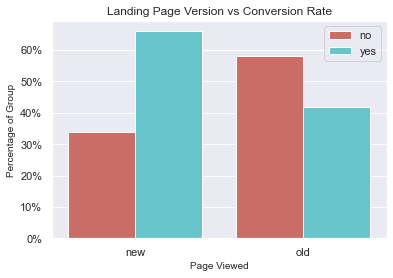

In [30]:
#Create Graph with title and labels
sns.set()
import matplotlib.ticker as mtick
pro =sns.countplot(x='landing_page', data = df, hue = 'converted', palette = 'hls')
pro.yaxis.set_major_formatter(mtick.PercentFormatter(xmax =50))
pro.set(title='Landing Page Version vs Conversion Rate')
pro.set_xticklabels(pro.get_xticklabels(),rotation = 360)
pro.set_ylabel("Percentage of Group", fontsize = 10)
pro.set_xlabel("Page Viewed", fontsize = 10)
plt.legend(loc='upper right')
plt.savefig('landing_page_conversion_rate1.png')

- Of the users who visited the new landing page, about twice as many subscribed to the E-news service compared to those who did not. 
- In contrast, for the old version of the page, the number of users who did not subscribe exceeded those who did by about 20%.
- This lends credibility to the alternative hypothesis  that the new webpage is far more effective than the old one at attracting new subscribers.

#### Hypothesis Testing: Equality of Two Proportions

In [31]:
from statsmodels.stats.proportion import proportions_ztest

# set the counts of converted users
defect_count = np.array([merged.loc['new','Converted'], merged.loc['old','Converted']])

# set the sample sizes
nobs = np.array([merged.loc['new','Users per Group'], merged.loc['old','Users per Group']])

# find the p-value
test_stat, p_value = proportions_ztest(defect_count, nobs)
print('The p-value is ' + str(p_value))

The p-value is 0.016052616408112556


Given that the pvalue is less than .05 for this sample of users, there is evidence to suggest that we can reject the null hypothesis and conclude that the users who visited the new landing page were more likely to be converted into subscribers than those exposed to the old site. 

### Q3 Does the converted status depend on the preferred language? 

The null hypothesis (default assumption):

>$H_0:$ The conversion rate does not depend on language

The alternate hypothesis:

>$H_a:$ The conversion rate does depend on language

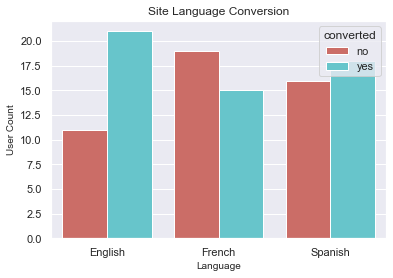

In [32]:
lang = sns.countplot(x = 'language_preferred', hue = 'converted', data = df, palette = 'hls')
lang.set_ylabel("User Count", fontsize = 10)
lang.set_xlabel("Language", fontsize = 10)
lang.set(title='Site Language Conversion')
#figure(figsize=(10, 10))
plt.savefig('language_User_Count_Conversion.png')

In [33]:
#Computing a cross tab table for chi square analysis
language_converted = pd.crosstab(df.converted, df.language_preferred, margins=True, margins_name="Total")

language_converted

language_preferred,English,French,Spanish,Total
converted,,,,
no,11,19,16,46
yes,21,15,18,54
Total,32,34,34,100


   #### Hypothesis Testing: Chi Square Test for Independence

- When comparing users of the three available languages (French, Spanish, English), the English and Spanish versions of the new landing page appear to be attracting more subscribers compared to those who did not subscribe.
- In fact the users who interacted with the English version of the page and then subscribed is double the number of English speaking users who did not subscribe. 
- The Spanish version was more evenly split between users who did and did not subscribe.
- In contrast, the number of people who visited the French page and then subscribed is less than those that did.

In [34]:
# import the required function
from scipy.stats import chi2_contingency

# find the p-value
chi, p_value, dof, expected = chi2_contingency(language_converted)
print('The p-value is', p_value)

The p-value is 0.7970832186581233


- As the p-value is large in this case, we cannot reject the null hypothesis.
- In other words, we have insufficient evidence based on the sample to conclude that language and conversion rate are dependent on eachother.

### Q4 Is the mean time spent on the new page same for the different language users?

In [35]:
#Calculating the mean amount of time in minutes per language
df.groupby('language_preferred')['time_spent_on_the_page'].mean()

language_preferred
English    5.559063
French     5.253235
Spanish    5.331765
Name: time_spent_on_the_page, dtype: float64

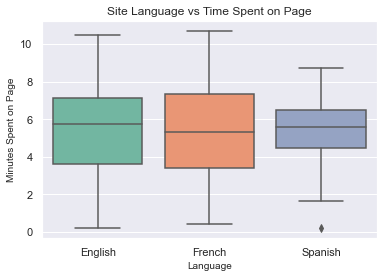

In [36]:
#Creating a boxplot to visualize the variances between the different groups 
lang = sns.boxplot(x='language_preferred', y='time_spent_on_the_page', data =df, palette = 'Set2')
lang.set_ylabel("Minutes Spent on Page", fontsize = 10)
lang.set_xlabel("Language", fontsize = 10)
lang.set(title='Site Language vs Time Spent on Page')
plt.savefig('language_anova_box_plot.png')
#figure(figsize=(10, 10))

- All three groups occupy a similar interquartile range of between 4 and 7 minutes per user.
- the minutes spent on the Spanish version has the least amount of variance and appears to be more evenly distributed compared to French and English
- French has the most variation out of all three languages.
- The differing IQRs between the three groups suggest that they differ more in variance than in mean which makes sense given that their means are all around 5 minutes.
- Given the highly similar means, this could likely suggest that we will not be able to reject the null hypothesis as the differences in range and variance within the three language groups appear more significant than the differences in mean among the three groups.

### Hypothesis Testing: ANOVA Test

In [37]:
#Checking the normality of the distribution
from scipy import stats

# find the p-value
w, p_value = stats.shapiro(df['time_spent_on_the_page']) 
print('The p-value is', p_value)

The p-value is 0.5643684267997742


Since the p value is high, the default assumption of normality cannot be rejected. This makes sense given that in the histogram plot, the time spent on the page appeared to follow a normal distribution as well as the fact that the mean and median values are both around 5 minutes.

In [38]:
#Assumption 2: Homogeneity of Variance
#import the required function
from scipy.stats import levene
statistic, p_value = levene( df['time_spent_on_the_page'][df['language_preferred']=="English"], 
                                   df['time_spent_on_the_page'][df['language_preferred']=="Spanish"], 
                                   df['time_spent_on_the_page'][df['language_preferred']=="French"])
# find the p-value
print('The p-value is', p_value)

The p-value is 0.06515086840327314


- While the p-value is quite low at 6%, it is not low enough to exceed the 5% significance level, therefore, for the purposes of analysis, we can assume the homogeneity of variances between the three languages and proceed with the anova hypothesis testing.

ANOVA (Analysis of Variance)

In [39]:
#import the required function
from scipy.stats import f_oneway

# perform one-way anova test
test_stat, p_value = f_oneway(df.loc[df['language_preferred'] == 'English', 'time_spent_on_the_page'],
                              df.loc[df['language_preferred'] == 'French', 'time_spent_on_the_page'],
                              df.loc[df['language_preferred'] == 'Spanish', 'time_spent_on_the_page'])
print('The p-value is ' + str(p_value))

The p-value is 0.8665610536012648


As the p-value for the anova test is large, as expected, we cannot reject the null hypothesis as it appears that the means of the time spent of the each language version of the page are all relatively equivalent within the context of the wider population based on the sample provided.

## Conclusion
- Overall the new landing page appears to be more effective than the old landing page at gathering new subscribers. Where on the old page the number of visitors who did not subscribe exceeded those who did by ~20% based on the sample, on the new page, the number of users who subscribed nearly doubled those who did.  At a p-value of  ~1.6%, we can conclude that based on the random normal sample provided, that the new page was more effective than the old one.


- The conversion rate does not appear to be impacted by the preferred language. Similarly the language version also does not appear to have a significant impact on the amount of time a user spends on a page as all three languages had a mean time of around 5 minutes. Overall, across all three languages, it appears the more time a user spends on the landing page regardless of the version, the more likely they are to subscribe.


- Given the above facts, a contributing factor to the success of the new page could be that with a p-value of less than 1%, we can conclude that there is sufficient evidence from this sample that users tend to spend more time on the new page than the old one. One recommendation would be to add more interactive features to the new site to engage new visitors more thoroughly, enticing them to spend more time on the site and potentially subscribe as a result. 

